In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.multiclass import OutputCodeClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import (
    f1_score,
    fbeta_score,
    matthews_corrcoef,
    log_loss,
    ConfusionMatrixDisplay,
    confusion_matrix,
    classification_report,
    make_scorer,
    balanced_accuracy_score,
    accuracy_score,
    roc_curve,
    auc,
    recall_score,
    roc_auc_score,
    average_precision_score,
    precision_score,
    precision_recall_curve,
    mean_squared_error,
    r2_score 
)
from lightgbm import LGBMClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
import pickle
import os
import scipy.io  # works with .mat files
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

pio.templates.default = "plotly_white"

In [2]:
data = pd.read_csv("./Data2.csv")

In [3]:
data.head()

,Region,Min Temperature (°C),Max Temperature (°C),Min Rainfall (mm),Max Rainfall (mm),Suitable Plants,Fertilizer_Usage,Pest_Incidence,Labor_Availability,Market_Access,Latitude,Longitude,Crop Yield (tons/ha),Humidity (%),Soil pH
0,NR II,11.004077,19.758442,800.600069,1191.746836,"Tobacco, Maize, Cotton, Wheat, Soybeans, Sorgh...",10.776568,2.436802,55.330001,37.752979,-18.131824,27.549598,6.379097,58.923697,6.027418
1,NR I,10.816030,19.023373,1081.520298,2091.587507,"Coffee, Tea, Bananas, Apples, Potatoes, Peas, ...",20.256833,5.472625,50.340687,54.735661,-20.048432,30.859975,8.017259,80.618611,5.683548
2,NR IV,27.137416,38.147434,505.100655,749.817097,"Drought-tolerant Maize, Sorghum, Pearl Millet,...",36.680267,24.498244,9.758948,10.088434,-19.809896,28.679102,3.230187,62.730184,5.598146
3,NR V,28.460751,41.841162,292.626374,803.932343,"Cattle, Game-ranching",51.822805,46.039781,14.342808,17.591870,-20.797487,28.941054,1.383723,56.890490,4.107096
4,NR III,19.442245,26.658988,486.435319,626.737037,"Maize, Cotton, Groundnuts, Sunflowers",39.628234,26.466224,15.678192,10.281220,-19.325166,29.552690,4.590995,61.968444,5.273699


In [4]:
data.shape

(2000, 15)

In [5]:
# Set the style of the visualization
sns.set(style="whitegrid")

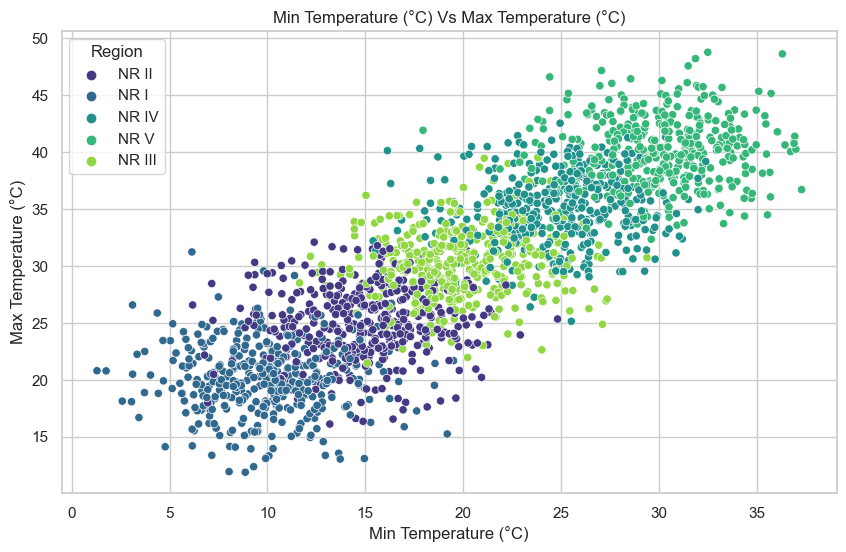

In [6]:
# Scatter plot of Temperature vs. Crop Yield
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Min Temperature (°C)",
    y="Max Temperature (°C)",
    hue="Region",
    data=data,
    palette="viridis",
)
plt.title("Min Temperature (°C) Vs Max Temperature (°C)")
plt.xlabel("Min Temperature (°C)")
plt.ylabel("Max Temperature (°C)")
plt.legend(title="Region")
plt.show()

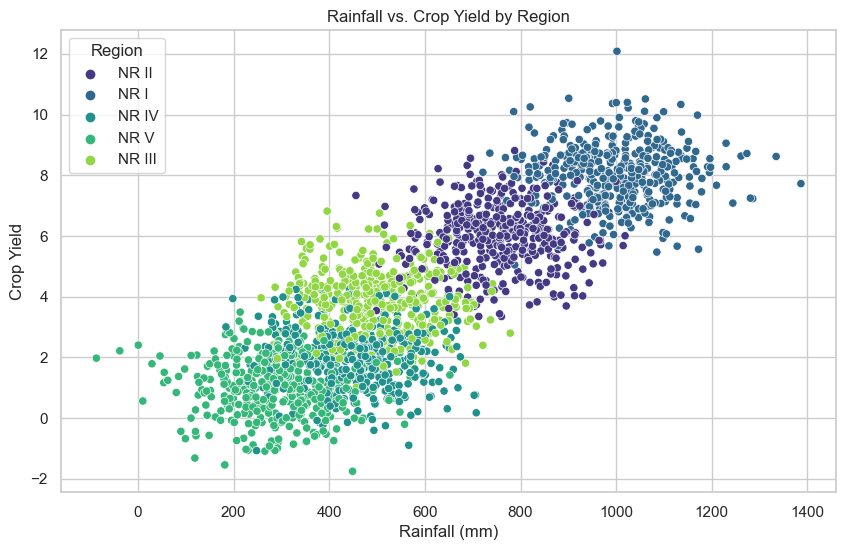

In [7]:
# Scatter plot of Rainfall vs. Crop Yield
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=("Min Rainfall (mm)"),
    y="Crop Yield (tons/ha)",
    hue="Region",
    data=data,
    palette="viridis",
)
plt.title("Rainfall vs. Crop Yield by Region")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Crop Yield")
plt.legend(title="Region")
plt.show()

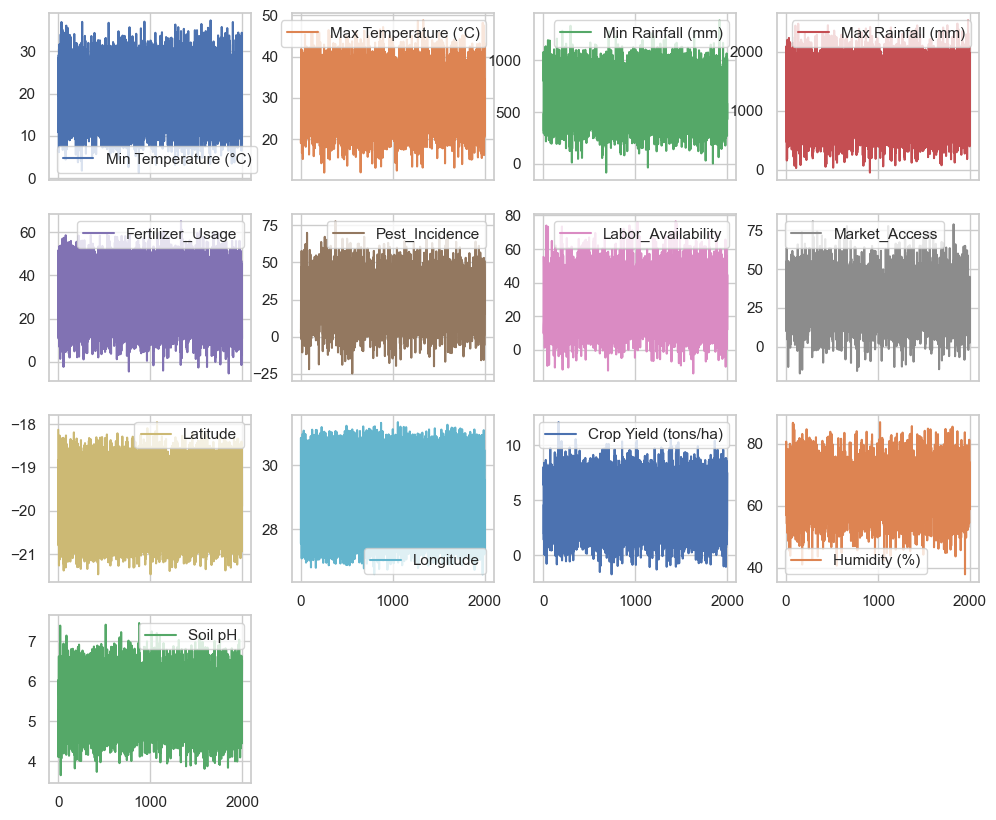

In [8]:
data.plot(subplots=True, layout=(4, 4), figsize=(12, 10))
plt.title("Plot of all columns")
plt.show()

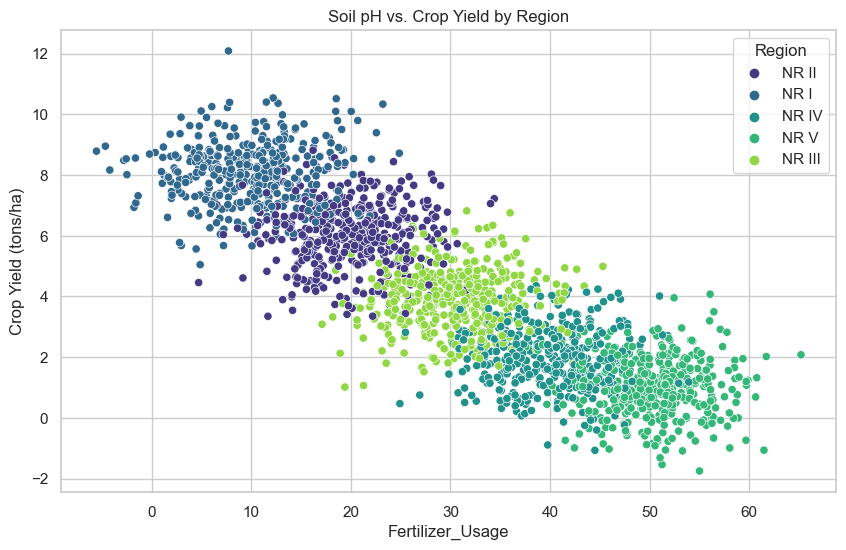

In [9]:
# Scatter plot of Soil pH vs. Crop Yield
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Fertilizer_Usage",
    y="Crop Yield (tons/ha)",
    hue="Region",
    data=data,
    palette="viridis",
)
plt.title("Soil pH vs. Crop Yield by Region")
plt.xlabel("Fertilizer_Usage")
plt.ylabel("Crop Yield (tons/ha)")
plt.legend(title="Region")
plt.show()

In [10]:
plots = "./plots/"

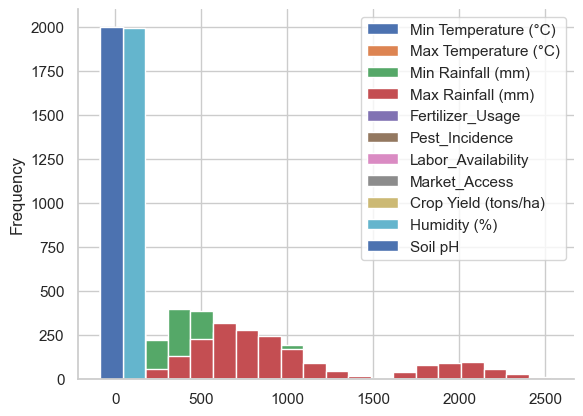

In [11]:
# All data
to_plot = data.drop(columns = ['Longitude', 'Latitude'])
to_plot.plot(kind="hist", bins=20, title="")
plt.gca().spines[
    [
        "top",
        "right",
    ]
].set_visible(False)
plt.savefig(plots + "all data plotted.png")

In [12]:
# feature distribution
fig_features = px.histogram(
    data,
    x=[
        "Min Temperature (°C)",
        "Max Temperature (°C)",
        "Min Rainfall (mm)",
        "Max Rainfall (mm)",
        "Fertilizer_Usage",
    ],
    title="Feature Distribution",
)
fig_features.show()

In [62]:
# feature distribution
fig_features = px.histogram(
    data,
    x=[
        "Pest_Incidence",
        "Labor_Availability",
        "Market_Access",
        "Crop Yield (tons/ha)",
        "Humidity (%)",
        "Soil pH",
    ],
    title="Feature Distribution",
)
fig_features.show()

c:\Users\Zayne Wakura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Zayne Wakura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Zayne Wakura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Zayne Wakura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Zayne Wakura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is 

ValueError: num must be an integer with 1 <= num <= 12, not 13

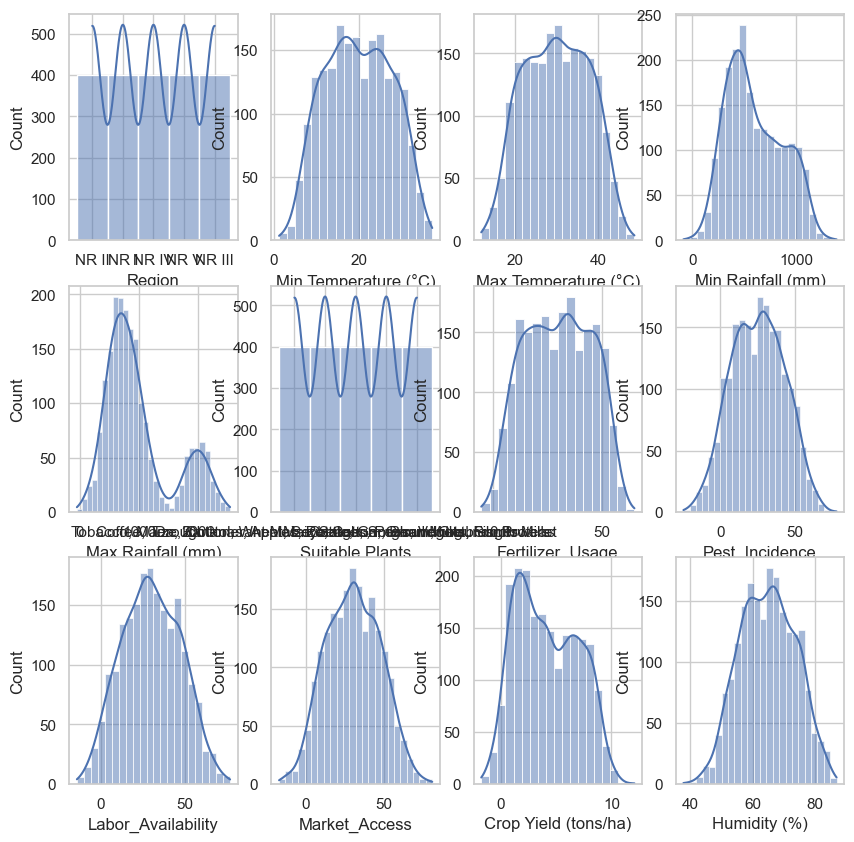

In [13]:
plt.figure(figsize=(10,10))
for i,col in enumerate(to_plot.columns,1):
    plt.subplot(3,4,i)
    sns.histplot(to_plot[col], kde=True)
plt.savefig('./visualPlots/more plots.png')

In [15]:
# label encoding regions
data.replace(
    {
        "Region": {
            "NR I": 0,
            "NR II": 1,
            "NR III": 2,
            "NR IV": 3,
            "NR V": 4,
        }
    },
    inplace=True,
)

In [14]:
# label encoding regions
data.replace(
    {
        "Suitable Plants": {
            "Coffee, Tea, Bananas, Apples, Potatoes, Peas, Vegetables, Proteas": 0,
            "Tobacco, Maize, Cotton, Wheat, Soybeans, Sorghum, Groundnuts": 1,
            "Maize, Cotton, Groundnuts, Sunflowers": 2,
            "Drought-tolerant Maize, Sorghum, Pearl Millet, Finger Millet": 3,
            "Cattle, Game-ranching": 4,
        }
    },
    inplace=True,
)

In [16]:
data

,Region,Min Temperature (°C),Max Temperature (°C),Min Rainfall (mm),Max Rainfall (mm),Suitable Plants,Fertilizer_Usage,Pest_Incidence,Labor_Availability,Market_Access,Latitude,Longitude,Crop Yield (tons/ha),Humidity (%),Soil pH
0,1,11.004077,19.758442,800.600069,1191.746836,1,10.776568,2.436802,55.330001,37.752979,-18.131824,27.549598,6.379097,58.923697,6.027418
1,0,10.816030,19.023373,1081.520298,2091.587507,0,20.256833,5.472625,50.340687,54.735661,-20.048432,30.859975,8.017259,80.618611,5.683548
2,3,27.137416,38.147434,505.100655,749.817097,3,36.680267,24.498244,9.758948,10.088434,-19.809896,28.679102,3.230187,62.730184,5.598146
3,4,28.460751,41.841162,292.626374,803.932343,4,51.822805,46.039781,14.342808,17.591870,-20.797487,28.941054,1.383723,56.890490,4.107096
4,2,19.442245,26.658988,486.435319,626.737037,2,39.628234,26.466224,15.678192,10.281220,-19.325166,29.552690,4.590995,61.968444,5.273699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,13.851866,21.034837,646.281945,1077.975337,1,15.826913,15.177693,38.501282,44.083605,-18.939432,27.204974,6.200297,68.000826,5.756660
1996,4,34.385288,43.352831,267.442350,395.050712,4,45.430082,51.099185,18.706267,2.316980,-20.939341,28.550583,2.140843,60.239310,4.448421
1997,3,25.133492,29.516693,584.319255,630.965270,3,25.487159,46.662684,44.475937,18.614821,-20.253882,29.019713,2.815482,59.022426,5.157300
1998,2,17.266927,34.523115,427.062283,494.064293,2,22.660306,36.030555,11.832821,28.723702,-19.169249,29.120745,4.351004,58.830362,5.159649


In [17]:
# Identify potential relationships (consider heatmap with Plotly)
coeData = data.drop(columns=[
    "Suitable Plants",
    "Pest_Incidence",
    "Labor_Availability",
    "Market_Access",
    "Latitude",
    "Longitude",
    'Region'
])

correlation_matrix = coeData.corr()

fig = px.imshow(
    correlation_matrix, title="Correlation Matrix of Credit Scoring Features"
)

fig.update_xaxes(title_text="Features")

fig.update_yaxes(title_text="Features")

fig.show()

In [18]:
# engineering our features
X = data.drop(columns=['Suitable Plants', 'Latitude', 'Longitude', 'Crop Yield (tons/ha)', 'Humidity (%)', 'Soil pH'])

In [19]:
X

,Region,Min Temperature (°C),Max Temperature (°C),Min Rainfall (mm),Max Rainfall (mm),Fertilizer_Usage,Pest_Incidence,Labor_Availability,Market_Access
0,1,11.004077,19.758442,800.600069,1191.746836,10.776568,2.436802,55.330001,37.752979
1,0,10.816030,19.023373,1081.520298,2091.587507,20.256833,5.472625,50.340687,54.735661
2,3,27.137416,38.147434,505.100655,749.817097,36.680267,24.498244,9.758948,10.088434
3,4,28.460751,41.841162,292.626374,803.932343,51.822805,46.039781,14.342808,17.591870
4,2,19.442245,26.658988,486.435319,626.737037,39.628234,26.466224,15.678192,10.281220
...,...,...,...,...,...,...,...,...,...
1995,1,13.851866,21.034837,646.281945,1077.975337,15.826913,15.177693,38.501282,44.083605
1996,4,34.385288,43.352831,267.442350,395.050712,45.430082,51.099185,18.706267,2.316980
1997,3,25.133492,29.516693,584.319255,630.965270,25.487159,46.662684,44.475937,18.614821
1998,2,17.266927,34.523115,427.062283,494.064293,22.660306,36.030555,11.832821,28.723702


In [20]:
Y = data['Suitable Plants']


In [21]:
Y

0       1
1       0
2       3
3       4
4       2
       ..
1995    1
1996    4
1997    3
1998    2
1999    0
Name: Suitable Plants, Length: 2000, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size = .2,
                                                    random_state = 2)

In [23]:
#checking the shape of the data
print (Y.shape, y_train.shape, y_test.shape)

(2000,) (1600,) (400,)


In [24]:
# instantiate Random Forest Classifier to rfModel
rfModel = RandomForestClassifier()

In [25]:
# Syntax
# randomforestclassifier.fit(our splitted X data, Y data)
rfModel.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
#Accuracy score
xTestPrediction = rfModel.predict(X_test)
testDataAccuracy = accuracy_score(xTestPrediction, y_test)

In [27]:
print('Accuracy: ', testDataAccuracy)

Accuracy:  1.0


In [28]:
# Make predictions on testing set
y_pred_rf = rfModel.predict(X_test)

# Evaluate model performance
rf_accuracy = accuracy_score(y_test, y_pred_rf)


print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 1.0


In [29]:
import joblib

# Save the model
joblib.dump(rfModel, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [30]:
# Random Forest model feature importance
feature_importances = rfModel.feature_importances_
features = X.columns
importance_series = pd.Series(feature_importances, index=features)

# Create a DataFrame for plotting
importance_df = importance_series.sort_values().reset_index()
importance_df.columns = ['Feature', 'Importance']

# Plot the feature importances
fig = px.bar(importance_df, x='Importance', y='Feature', orientation='h',
             title='Feature Importances', labels={'Importance': 'Importance', 'Feature': 'Features'})

fig.show()

In [31]:
# Define the models 
models = { 
"Decision Tree": DecisionTreeClassifier(), 
"Random Forest": RandomForestClassifier(), 
"Gradient Boosting": GradientBoostingClassifier(), 
"Support Vector Machine": SVC(), 
"Logistic Regression": LogisticRegression(), 
"Neural Network": MLPClassifier(max_iter=500) 
} 
# Train and evaluate the models 
results = []

In [32]:
# Train and evaluate the models 
results = [] 
for model_name, model in models.items(): 
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred) 
    precision = precision_score(y_test, y_pred, average='weighted') 
    recall = recall_score(y_test, y_pred, average='weighted') 
    f1 = f1_score(y_test, y_pred, average='weighted') 
    mse = mean_squared_error(y_test, y_pred) 
    r2 = r2_score(y_test, y_pred) 
    results.append({ 
        "Model": model_name, 
        "Accuracy": accuracy, 
        "Precision": precision, 
        "Recall": recall, 
        "F1 Score": f1, 
        "MSE": mse, 
        "R2 Score": r2 
    }) 
    # Convert results to DataFrame for better visualization 
    results_df = pd.DataFrame(results) 
    # Display the performance metrics 
    print(results_df) 

           Model  Accuracy  Precision  Recall  F1 Score  MSE  R2 Score
0  Decision Tree       1.0        1.0     1.0       1.0  0.0       1.0
           Model  Accuracy  Precision  Recall  F1 Score  MSE  R2 Score
0  Decision Tree       1.0        1.0     1.0       1.0  0.0       1.0
1  Random Forest       1.0        1.0     1.0       1.0  0.0       1.0
               Model  Accuracy  Precision  Recall  F1 Score  MSE  R2 Score
0      Decision Tree       1.0        1.0     1.0       1.0  0.0       1.0
1      Random Forest       1.0        1.0     1.0       1.0  0.0       1.0
2  Gradient Boosting       1.0        1.0     1.0       1.0  0.0       1.0
                    Model  Accuracy  Precision  Recall  F1 Score   MSE  \
0           Decision Tree     1.000   1.000000   1.000  1.000000  0.00   
1           Random Forest     1.000   1.000000   1.000  1.000000  0.00   
2       Gradient Boosting     1.000   1.000000   1.000  1.000000  0.00   
3  Support Vector Machine     0.755   0.750779   

c:\Users\Zayne Wakura\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



                    Model  Accuracy  Precision  Recall  F1 Score     MSE  \
0           Decision Tree    1.0000   1.000000  1.0000  1.000000  0.0000   
1           Random Forest    1.0000   1.000000  1.0000  1.000000  0.0000   
2       Gradient Boosting    1.0000   1.000000  1.0000  1.000000  0.0000   
3  Support Vector Machine    0.7550   0.750779  0.7550  0.752056  0.2900   
4     Logistic Regression    0.9075   0.907821  0.9075  0.907550  0.0925   
5          Neural Network    0.9075   0.910116  0.9075  0.907407  0.0925   

   R2 Score  
0  1.000000  
1  1.000000  
2  1.000000  
3  0.860038  
4  0.955357  
5  0.955357  


In [33]:
results_df.to_csv("model_performance_metrics.csv", index=False) 

In [ ]:
import joblib

# Save the model
joblib.dump(model, 'random_forest_model.pkl')

In [34]:
import joblib

# Save Logistic Regression model
for model_name, model in models.items():
    joblib.dump(models, model_name + '.pkl')